***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [85]:
import pandas as pd
import scipy
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [86]:
data = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [87]:
data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [88]:
maximo = data.Renda.max()
classes = [
    0, 
    2 * 788, 
    5 * 788, 
    15 * 788, 
    25 * 788, 
    maximo
    ]


### 2º Definir os labels das classes

In [89]:
tags = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [90]:
classes_count = pd.value_counts(
    pd.cut(x=data.Renda, bins=classes, labels=tags, include_lowest=True)
    )

### 4º Construir a coluna de percentuais

In [91]:
classes_percent = pd.value_counts(
    pd.cut(x=data.Renda, bins=classes, labels=tags, include_lowest=True),
    normalize=True
    ) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [92]:
dataFrame = pd.DataFrame({'Frequência':classes_count, 'Percentual':classes_percent})
dataFrame_sorted = dataFrame.sort_index(ascending=False)
dataFrame_sorted

,Frequência,Percentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

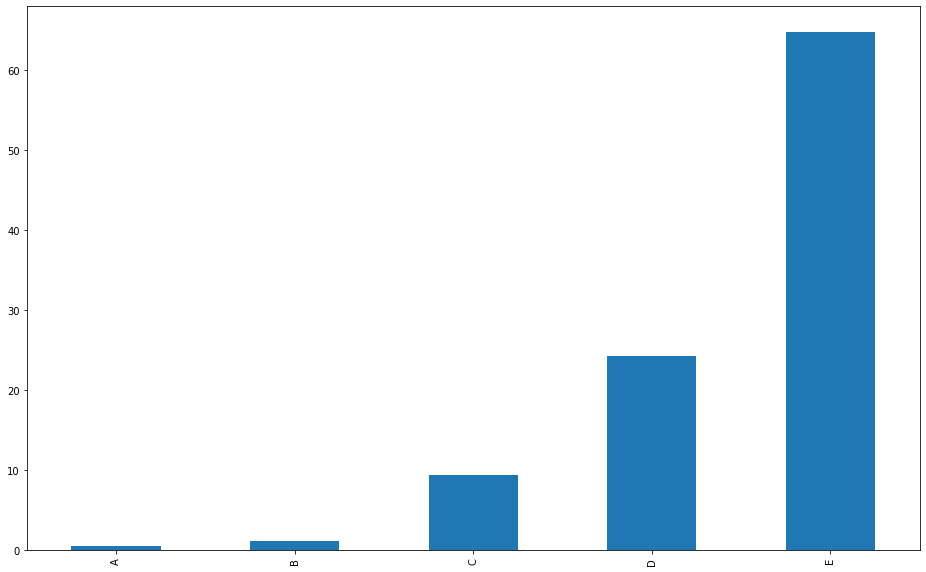

In [93]:
dataFrame_sorted['Percentual'].plot.bar(figsize=(16,10))

> ### Conclusões

É possível observar que renda segue um padrão assimetrico onde a maioria das pessoas entrevistadas se enquadram na classe E enquanto uma minoria estra inclusa na classe A. O que torna uma análise de média imprecisa, sendo o ideal o calculo da Moda.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

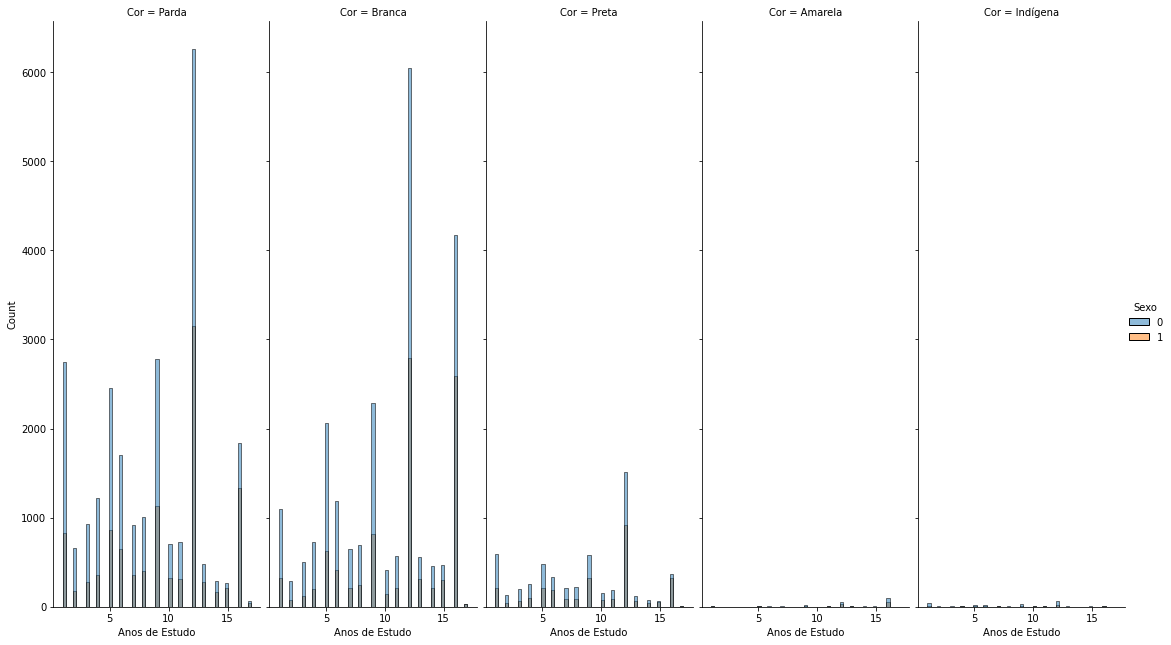

In [94]:
cod = [0, 2, 4, 6, 8, 9]
cor = ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração']
data['Cor'].replace([0, 2, 4, 6, 8, 9],['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], inplace=True)
ax = sns.displot(data=data, x='Anos de Estudo', col='Cor', hue='Sexo')
ax.figure.set_size_inches(16,10)
ax 

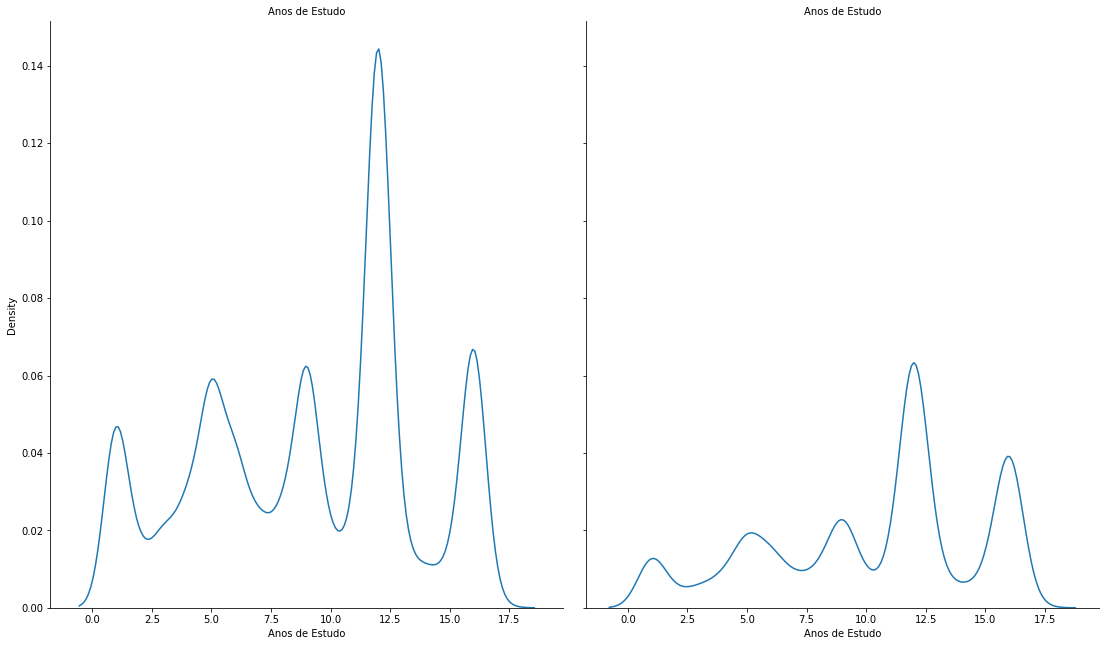

In [95]:
# Anos de Estudo, Idade, Renda
# 0 = Masculino; 1 = Feminino
ax = sns.displot(data=data, x='Anos de Estudo', col='Sexo', kind='kde')
ax.figure.set_size_inches(16,10)
ax.set_titles('Anos de Estudo')
ax

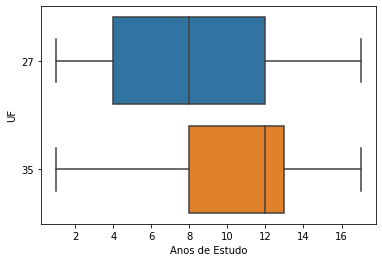

In [96]:

ax = sns.boxplot(x="Anos de Estudo", y='UF', data = data.query('(UF==35 or UF==27) and Renda < 20000'), orient='h')

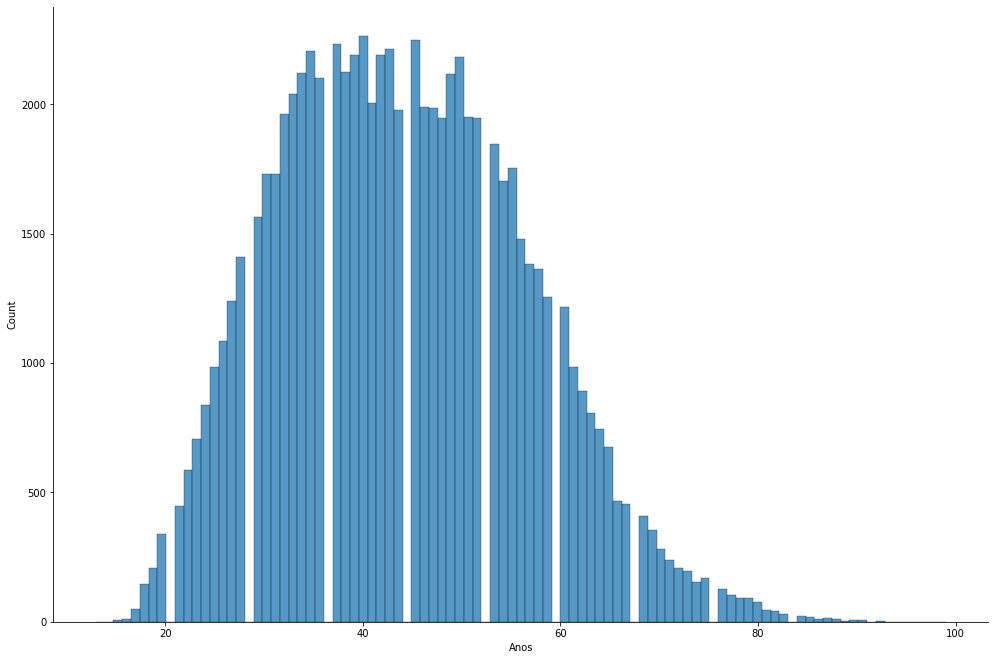

In [97]:
ax = sns.displot(data['Idade'])
ax.figure.set_size_inches(16,10)
ax.set_titles('Distribuição de Idade')
ax.set_xlabels('Anos')
ax

> ### Conclusões

1 - Foram entrevistadas mais pessoas brancas e pardas no estudo e dentro dessa amostragem é possível perceber que o a diferença de escolaridade entre essas duas cores é menor do que a diferença entre as pessoas de cor preta, onde as mulheres na média possuem uma nível de escolaridade maior que a dos homens.

2 - Homens e mulheres possum uma assimetria a direita no périodo de estudo, o que significa uma tendência de ambos os sexos de se qualificarem mais ao logo dos anos, pórem a essa assimetria é mais ascentuada em mulheres que possuem uma tendência maior a se qualificarem mais do que os homens.

3 - Entre as pessoas entrevistadas em SP versus AL, existe uma tendência de salários maiores no estado de São Paulo.

4 - Entre os entrevistados o dado foi coletado majoritariamente com pessoa com a média de idade entre 30 - 50 anos, o que representa a confiabilidade dos dados de renda, aja vista que as entrevistas foram realizadas em sua maioria com os(as) chefes de famílias.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

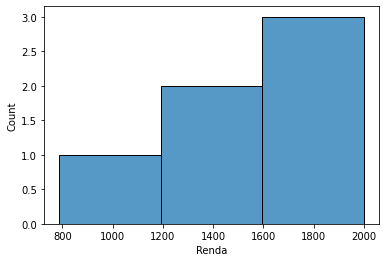

In [98]:
histo =  sns.histplot(data.Renda.quantile([0.25,0.5,0.75]), cumulative=True)

c:\VS CODE - Projetos\data-science-alura\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

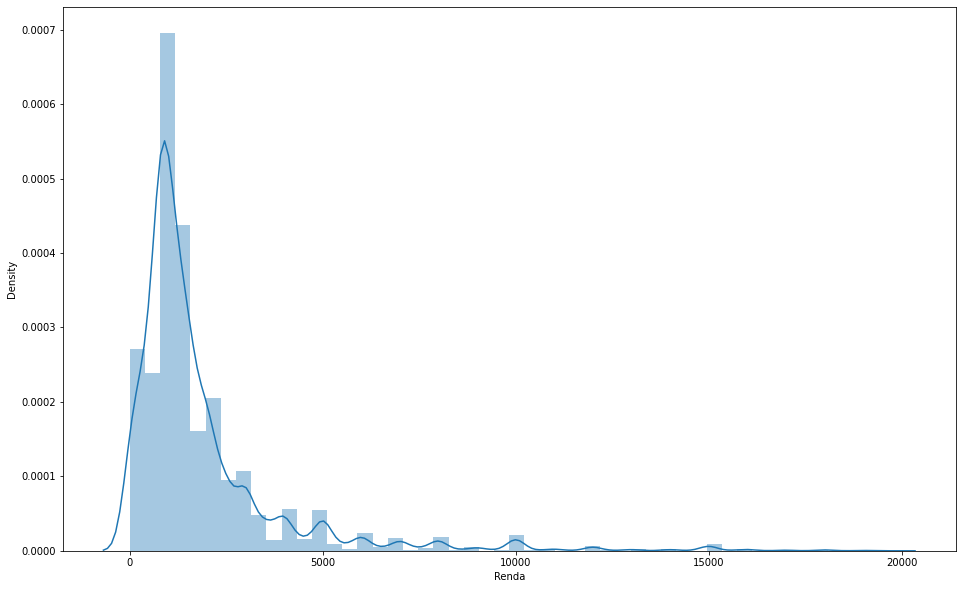

In [99]:
# distplot will be removed in a future version, but visualization are better
histo = sns.distplot(data.query('Renda < 20000')['Renda'])
histo.figure.set_size_inches(16,10)
histo

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [100]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [101]:
data['Sexo'].replace(sexo, inplace=True)
data['UF'].replace(uf, inplace=True)
data['Anos de Estudo'].replace(anos_de_estudo, inplace=True)
count_anos = data['Anos de Estudo'].value_counts()
count_anos_percent = data['Anos de Estudo'].value_counts(normalize=True) * 100
pd.DataFrame({'Frequência Anos Estudo':count_anos, 'Percentual Anos Estudo':count_anos_percent})


,Frequência Anos Estudo,Percentual Anos Estudo
11 anos,20848,27.131702
15 anos ou mais,10795,14.048673
8 anos,7980,10.385216
4 anos,6729,8.757158
Sem instrução e menos de 1 ano,5849,7.611921
5 anos,4499,5.855023
3 anos,2891,3.762363
7 anos,2689,3.499479
6 anos,2445,3.181936
10 anos,2118,2.756377


In [102]:
count_sexo = data['Sexo'].value_counts()
count_sexo_percent = data['Sexo'].value_counts(normalize=True) * 100
pd.DataFrame({'Frequência Sexo': count_sexo, 'Percentual Sexo':count_sexo_percent})

,Frequência Sexo,Percentual Sexo
Masculino,53250,69.299844
Feminino,23590,30.700156


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [103]:
data['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [104]:
data['Renda'].median()

1200.0

### Obtenha a moda

In [105]:
data['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [106]:
data['Renda'].mad()

1526.4951371638058

### Obtenha a variância

In [107]:
data['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [108]:
data['Renda'].std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [116]:
percentual = pd.crosstab(data.Cor, data.Sexo, values=data.Renda, aggfunc={'mean', 'median', 'max'})
percentual

max                   mean                median          
Sexo     Feminino Masculino     Feminino    Masculino Feminino Masculino
Cor                                                                     
Amarela     20000     50000  3027.341880  4758.251064   1500.0    2800.0
Branca     100000    200000  2109.866750  2925.744435   1200.0    1700.0
Indígena   120000     10000  2464.386139  1081.710938    788.0     797.5
Parda       30000    100000  1176.758516  1659.577425    800.0    1200.0
Preta       23000     50000  1134.596400  1603.861687    800.0    1200.0

> ### Conclusões

Como mencionado na análise anterior é possivel constatar nesse data frame que a maioria dos entrevistados se enquadra na classificação de homens pardos e brancos, o que configura como uma sendo a maior parte dos chefes de família no estudo.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
desvio_padrao_populacional = pd.crosstab(data.Cor, data.Sexo, values=data.Renda, aggfunc={'mad', 'var', 'std'})
desvio_padrao_populacional


mad                        std                        var  \
Sexo         Feminino    Masculino      Feminino    Masculino      Feminino   
Cor                                                                           
Amarela   2549.146322  3709.597211   3731.173660  5740.824820  1.392166e+07   
Branca    1670.967106  2261.012346   3251.013154  4750.791872  1.056909e+07   
Indígena  3007.892952   798.910889  11957.498292  1204.093490  1.429818e+08   
Parda      811.580946  1125.827704   1596.233048  2312.087184  2.547960e+06   
Preta      705.453357   975.602482   1349.799809  1936.309271  1.821960e+06   

                        
Sexo         Masculino  
Cor                     
Amarela   3.295707e+07  
Branca    2.257002e+07  
Indígena  1.449841e+06  
Parda     5.345747e+06  
Preta     3.749294e+06

> ### Conclusões

 1 - Avaliando apenas a mediana é possível observar que homens da cor amarela possuem uma desempenho maior do que homens e mulheres de outras cores, porém nos valores máximo é possivel observar que homens brancos possue o maior ponto fora da curva enquanto nas mulheres o maior ponto fora da curva pertence a uma indigena. 
 
 2 -  Porém no geral quando é avaliado a desigualdade entre as populações é possível observar que as população feminina branca é a mais homogênea com o menor indice de variância seguidas pelas mulheres de cor amarela e no caso das populações pardas, tanto no feminino como no masculino, são populações com os maiores indicies de variância sendo o maior dentre os sexos o homem.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='Renda', ylabel='Sexo'>

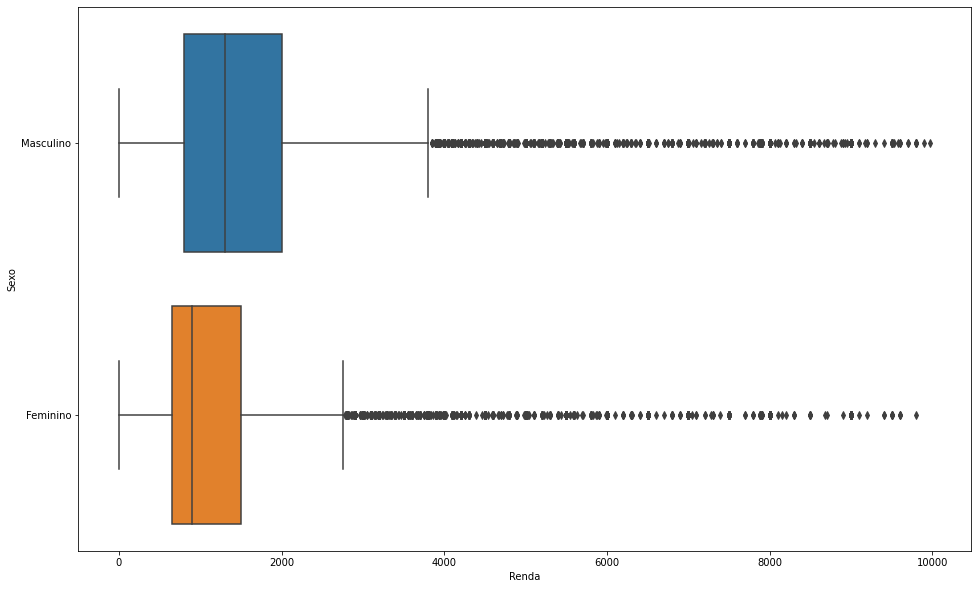

In [121]:
ax = sns.boxplot(data=data.query('Renda < 10000'), x='Renda', y='Sexo', orient='h')
ax.figure.set_size_inches(16,10)
ax

> ### Conclusões

Demonstração da média sálarial entre sexos demonstra uma assimetria com inclinação a direita maior para homens, o que significa uma médiana e uma moda (valores mais frequêntes) de valores maiores para homens.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [131]:
from scipy import stats
stats.percentileofscore(data.Renda, 788, kind='weak')


28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [127]:
data['Renda'].quantile([0.99])

0.99    15000.0
Name: Renda, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [128]:
pd.crosstab(data['Anos de Estudo'], data.Sexo, values=data.Renda, aggfunc={'mean', 'median', 'std', 'max'})

max                   mean               \
Sexo                           Feminino Masculino     Feminino    Masculino   
Anos de Estudo                                                                
1 ano                              2000     30000   492.771987   895.629047   
10 anos                            6000     45000   925.919225  1731.270847   
11 anos                          100000    200000  1286.790889  2117.060504   
12 anos                          120000     30000  1682.313725  2470.330776   
13 anos                           20000     25000  1911.730047  3195.099154   
14 anos                           20000     50000  2226.460457  3706.620269   
15 anos ou mais                  100000    200000  3899.513231  6134.279790   
2 anos                             4000     40000   529.911638   931.178986   
3 anos                             3500     80000   546.853916  1109.203862   
4 anos                            10000     50000   704.279111  1302.329283   
5 anos                             8000     35000   781.389776  1338.653218   
6 anos                             6000     25000   833.732824  1448.875419   
7 anos                             9000     40000   830.751004  1465.497940   
8 anos                            18000     30000   933.615351  1639.396667   
9 anos                            20000     60000   868.021700  1508.038850   
Não determinados                   3000      7000   798.174419  1295.761905   
Sem instrução e menos de 1 ano    10000     30000   516.201748   799.494638   

                                 median                    std               
Sexo                           Feminino Masculino     Feminino    Masculino  
Anos de Estudo                                                               
1 ano                             400.0     788.0   425.291842  1331.950552  
10 anos                           800.0    1218.0   620.611907  2078.609734  
11 anos                          1000.0    1500.0  1819.040417  2676.538942  
12 anos                          1200.0    1800.0  4851.833513  2268.081538  
13 anos                          1300.0    2400.0  2053.789771  2797.116800  
14 anos                          1600.0    2500.0  2064.083336  3987.214974  
15 anos ou mais                  2800.0    4000.0  4212.770709  7447.613594  
2 anos                            450.0     788.0   498.234168  1435.173827  
3 anos                            500.0     800.0   424.124446  2143.800133  
4 anos                            788.0    1000.0   629.553397  1419.821787  
5 anos                            788.0    1045.0   635.782641  1484.650587  
6 anos                            788.0    1200.0   574.547028  1476.628602  
7 anos                            788.0    1200.0   602.038029  1419.708673  
8 anos                            800.0    1300.0   896.781213  1515.583715  
9 anos                            788.0    1200.0   973.221652  2137.664774  
Não determinados                  788.0    1200.0   459.985964   979.648745  
Sem instrução e menos de 1 ano    390.0     700.0   639.311534  1023.904884

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

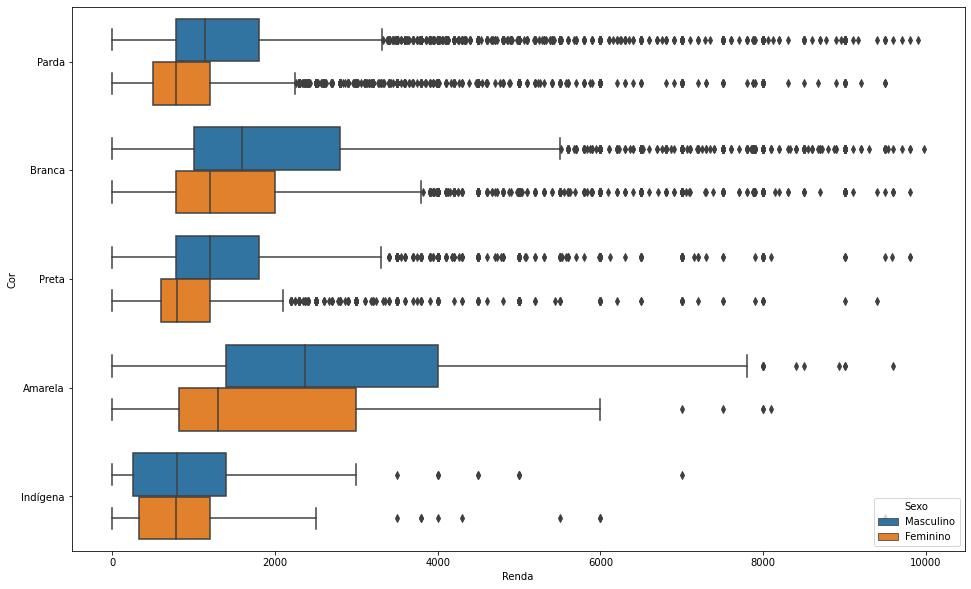

In [130]:
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=data.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(16,10)

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...